<a href="https://colab.research.google.com/github/ManjuKonatala/FML/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dt=pd.read_csv("/content/lr.csv")

In [ ]:
dt.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
dt.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
x=dt.iloc[:,:-1].values

In [ ]:
x

array([[15624510, 'Male', 19, 19000],
       [15810944, 'Male', 35, 20000],
       [15668575, 'Female', 26, 43000],
       ...,
       [15654296, 'Female', 50, 20000],
       [15755018, 'Male', 36, 33000],
       [15594041, 'Female', 49, 36000]], dtype=object)

In [ ]:
y=dt.iloc[:,4].values

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
x[:,1]=label_encoder_x.fit_transform(x[:,1])

In [ ]:
x[:,1]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [ ]:
x

array([[15624510, 1, 19, 19000],
       [15810944, 1, 35, 20000],
       [15668575, 0, 26, 43000],
       ...,
       [15654296, 0, 50, 20000],
       [15755018, 1, 36, 33000],
       [15594041, 0, 49, 36000]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train) 

In [ ]:
x_train

array([[-0.37311852,  1.02532046,  1.92295008,  2.14601566],
       [-1.22319878, -0.97530483,  2.02016082,  0.3787193 ],
       [-0.596909  , -0.97530483, -1.3822153 , -0.4324987 ],
       ...,
       [-1.4157145 ,  1.02532046, -0.21568634, -0.51941492],
       [ 1.20822913, -0.97530483, -1.09058306, -0.46147078],
       [ 1.46809058, -0.97530483, -1.18779381,  1.3927418 ]])

In [ ]:
x_test=st_x.transform(x_test)

In [ ]:
x_test

array([[ 4.88966473e-01,  1.02532046e+00, -7.98950822e-01,
         4.94607583e-01],
       [-5.50592839e-01, -9.75304830e-01, -2.12648508e-02,
        -5.77359062e-01],
       [ 1.21526737e+00,  1.02532046e+00, -3.12897090e-01,
         1.46942725e-01],
       [ 6.70428177e-01, -9.75304830e-01, -7.98950822e-01,
         2.62831011e-01],
       [-7.54886252e-01, -9.75304830e-01, -3.12897090e-01,
        -5.77359062e-01],
       [ 1.74256773e+00,  1.02532046e+00, -1.09058306e+00,
        -1.44652121e+00],
       [-1.15026219e+00, -9.75304830e-01, -7.01740076e-01,
        -1.59138156e+00],
       [-1.50619343e-01,  1.02532046e+00, -2.15686344e-01,
         2.14601566e+00],
       [-3.55608066e-01, -9.75304830e-01, -1.96547978e+00,
        -5.58617754e-02],
       [-9.75185983e-01,  1.02532046e+00,  8.53631867e-01,
        -7.80163563e-01],
       [-2.52081338e-02,  1.02532046e+00, -7.98950822e-01,
        -6.06331134e-01],
       [ 1.54471657e+00, -9.75304830e-01, -9.93372315e-01,
      

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[57,  1],
       [ 5, 17]])

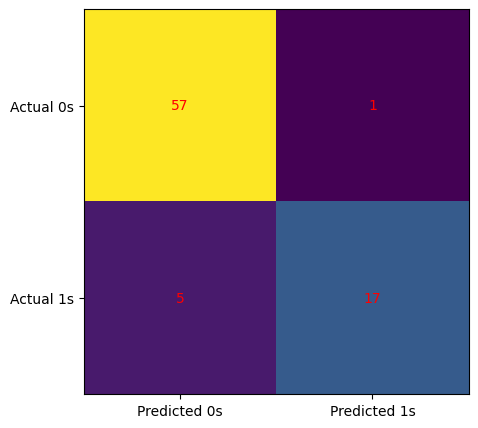

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80

